In [36]:
import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [37]:
data_intake = pd.read_csv("../data/Austin_Animal_Center_Intakes.csv")
data_out = pd.read_csv("../data/Austin_Animal_Center_Outcomes.csv")

In [39]:
data_intake.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [40]:
data_out.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [41]:
data_intake = data_intake.drop_duplicates(subset=["Animal ID"], keep=False)
data_out = data_out.drop_duplicates(subset=["Animal ID"], keep=False)

data_intake = data_intake[data_intake["Animal Type"].isin(["Cat", "Dog"])]
data_out = data_out[data_out["Animal Type"].isin(["Cat", "Dog"])]

data_out = data_out[data_out["Outcome Type"].isin(["Adoption"])]

In [42]:
ids_in = data_intake["Animal ID"].values.tolist()
ids_out = data_out["Animal ID"].values.tolist()

In [43]:
len(ids_in), len(ids_out)

(107250, 49437)

Find the common animal ids between in and out data.

In [8]:
common_ids = []
for id_in in ids_in:
    if id_in in ids_out:
        common_ids.append(id_in)

Keep the data rows with the common ids

In [9]:
data_out = data_out[data_out["Animal ID"].isin(common_ids)]
data_intake = data_intake[data_intake["Animal ID"].isin(common_ids)]

In [10]:
data_intake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48845 entries, 7 to 141743
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Animal ID         48845 non-null  object
 1   Name              38652 non-null  object
 2   DateTime          48845 non-null  object
 3   MonthYear         48845 non-null  object
 4   Found Location    48845 non-null  object
 5   Intake Type       48845 non-null  object
 6   Intake Condition  48845 non-null  object
 7   Animal Type       48845 non-null  object
 8   Sex upon Intake   48845 non-null  object
 9   Age upon Intake   48845 non-null  object
 10  Breed             48845 non-null  object
 11  Color             48845 non-null  object
dtypes: object(12)
memory usage: 4.8+ MB


In [11]:
data_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48845 entries, 1 to 141549
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Animal ID         48845 non-null  object
 1   Name              38652 non-null  object
 2   DateTime          48845 non-null  object
 3   MonthYear         48845 non-null  object
 4   Date of Birth     48845 non-null  object
 5   Outcome Type      48845 non-null  object
 6   Outcome Subtype   11253 non-null  object
 7   Animal Type       48845 non-null  object
 8   Sex upon Outcome  48845 non-null  object
 9   Age upon Outcome  48845 non-null  object
 10  Breed             48845 non-null  object
 11  Color             48845 non-null  object
dtypes: object(12)
memory usage: 4.8+ MB


Checking the number of rows. They should be the same.

In [12]:
len(data_intake), len(data_out)

(48845, 48845)

In [13]:
data_intake.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
7,A844350,*Ella,10/15/2021 11:40:00 AM,October 2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby
9,A818975,NaN,06/18/2020 02:53:00 PM,June 2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby
12,A760053,NaN,10/11/2017 03:46:00 PM,October 2017,8800 South First Street in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Chihuahua Shorthair,White/Tan
13,A707375,*Candy Cane,07/11/2015 06:19:00 PM,July 2015,Galilee Court And Damita Jo Dr in Manor (TX),Stray,Normal,Dog,Intact Female,5 months,Pit Bull,Brown/White
14,A696408,*Pearl,02/04/2015 12:58:00 PM,February 2015,9705 Thaxton in Austin (TX),Stray,Normal,Dog,Intact Female,2 years,Chihuahua Shorthair,Tricolor


In [14]:
data_out.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
6,A814515,Quentin,05/06/2020 07:59:00 AM,May 2020,03/01/2018,Adoption,Foster,Dog,Neutered Male,2 years,American Foxhound/Labrador Retriever,White/Brown
7,A689724,*Donatello,10/18/2014 06:52:00 PM,Oct 2014,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
8,A680969,*Zeus,08/05/2014 04:59:00 PM,Aug 2014,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby
9,A840370,Tulip,08/19/2021 07:36:00 PM,Aug 2021,08/06/2019,Adoption,NaN,Dog,Spayed Female,2 years,Border Collie/Cardigan Welsh Corgi,Black/White


Let's implement a function to convert the ages into numbers. We use days as the common time measure here.

In [15]:
def updateAge(ages):
    age_list = []
    for age in ages:
        if "day" in age:
            age_val = int(age.split(" ")[0])
        elif "week" in age:
            age_val = int(age.split(" ")[0])*7
        elif "month" in age:
            age_val = int(age.split(" ")[0])*30
        elif "year" in age:
            age_val = int(age.split(" ")[0])*365
        
        age_list.append(age_val)
    return age_list

Let's correct the ages with this function.

In [16]:
data_intake["Age upon Intake"] = updateAge(data_intake["Age upon Intake"].values)

Below, we calculate the days difference between the in and out files. We need to convert the date field using the datetime type. We add that into the intake file and continue with the intake data after this point.

In [17]:
count=0
format_string = "%m/%d/%Y %I:%M:%S %p"
for index, row in data_intake.iterrows():
    count+=1
    if count%1000==0:
        print(count)
    out_row = data_out[data_out["Animal ID"]==row["Animal ID"]]
    out_datetime = datetime.datetime.strptime(out_row["DateTime"].values[0], format_string)
    in_datetime = datetime.datetime.strptime(row["DateTime"], format_string)
    
    data_intake.loc[index,["Days"]] = float((out_datetime-in_datetime).days)
    
    data_intake.loc[index,["Outcome Type"]] = out_row["Outcome Type"].values[0]

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000


Let's take another look at the file.

In [18]:
data_intake.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Days,Outcome Type
7,A844350,*Ella,10/15/2021 11:40:00 AM,October 2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,180,Domestic Shorthair,Brown Tabby,5.0,Adoption
9,A818975,NaN,06/18/2020 02:53:00 PM,June 2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,28,Domestic Shorthair,Cream Tabby,35.0,Adoption
12,A760053,NaN,10/11/2017 03:46:00 PM,October 2017,8800 South First Street in Austin (TX),Stray,Normal,Dog,Intact Male,730,Chihuahua Shorthair,White/Tan,4.0,Adoption
13,A707375,*Candy Cane,07/11/2015 06:19:00 PM,July 2015,Galilee Court And Damita Jo Dr in Manor (TX),Stray,Normal,Dog,Intact Female,150,Pit Bull,Brown/White,139.0,Adoption
14,A696408,*Pearl,02/04/2015 12:58:00 PM,February 2015,9705 Thaxton in Austin (TX),Stray,Normal,Dog,Intact Female,730,Chihuahua Shorthair,Tricolor,112.0,Adoption


In [22]:
data_intake["Days"].values.std()

58.3366013556196

Let's see the histogram for the days for adoption.

In [ ]:
plt.hist(data_intake["Days"].values.tolist(), bins=100, facecolor='g', alpha=0.75)
plt.xlabel('Days')
plt.ylabel('Number of Records')
plt.title('Distribution of Days for adoption')
plt.show()

We have a large number of records towards the smaller numbers. This is difficult to work with. Let's focus only on the values less than 150. 

In [23]:
small_list = []
for item in data_intake["Days"].values.tolist():
    if item<150:
        if item<0: # fix negative days
            item=0.0
        small_list.append(item)

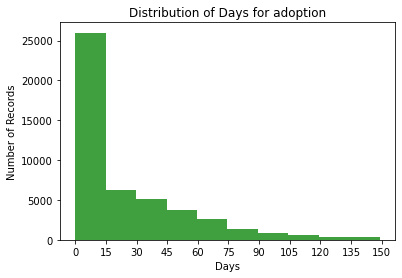

In [25]:
fig, ax = plt.subplots(1,1)
plt.hist(small_list, bins=10, facecolor='g', alpha=0.75)
plt.xlabel('Days')
plt.ylabel('Number of Records')
plt.title('Distribution of Days for adoption')
ax.set_xticks([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150])
ax.set_xticklabels([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150])
plt.show()

We can see from this histogram that there is a big group that was adopted within the first bin of the histogram. We decide to use this as the separation point for our classification problem. Therefore, we wil try to predict whether a pet will be adopted within 15 days or not.

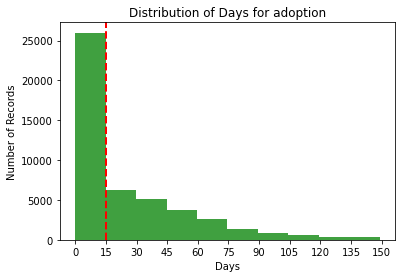

In [26]:
fig, ax = plt.subplots(1,1)
plt.hist(small_list, bins=10, facecolor='g', alpha=0.75)
plt.xlabel('Days')
plt.ylabel('Number of Records')
plt.title('Distribution of Days for adoption')
plt.axvline(15, color='r', linestyle='dashed', linewidth=2)
ax.set_xticks([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150])
ax.set_xticklabels([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150])
plt.savefig("data_histogram.png", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None
       )
plt.show()

In [27]:
target_list = [1 if item<15 else 0 for item in data_intake["Days"].values.tolist()]

data_intake["Days"] = target_list

In [28]:
data_intake.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Days,Outcome Type
7,A844350,*Ella,10/15/2021 11:40:00 AM,October 2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,180,Domestic Shorthair,Brown Tabby,1,Adoption
9,A818975,NaN,06/18/2020 02:53:00 PM,June 2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,28,Domestic Shorthair,Cream Tabby,0,Adoption
12,A760053,NaN,10/11/2017 03:46:00 PM,October 2017,8800 South First Street in Austin (TX),Stray,Normal,Dog,Intact Male,730,Chihuahua Shorthair,White/Tan,1,Adoption
13,A707375,*Candy Cane,07/11/2015 06:19:00 PM,July 2015,Galilee Court And Damita Jo Dr in Manor (TX),Stray,Normal,Dog,Intact Female,150,Pit Bull,Brown/White,0,Adoption
14,A696408,*Pearl,02/04/2015 12:58:00 PM,February 2015,9705 Thaxton in Austin (TX),Stray,Normal,Dog,Intact Female,730,Chihuahua Shorthair,Tricolor,0,Adoption


In [35]:
data_intake["Intake Condition"].value_counts()

Normal      44476
Injured      1904
Nursing      1088
Sick          980
Neonatal       88
Aged           80
Medical        73
Other          73
Pregnant       38
Feral          31
Behavior       12
Med Attn        2
Name: Intake Condition, dtype: int64

In [ ]:
y = data_intake["Days"].values
X = data_intake.drop(columns=["Days", "Outcome Type"])

for c in ["Intake Type", "Intake Condition", "Animal Type", "Sex upon Intake", "Breed", "Color"]:
    X[c] = X[c].astype("category")

X["Age upon Intake"] = X["Age upon Intake"].astype("float")

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, random_state=169, stratify=y
)

X_test, X_valid, y_test, y_valid = train_test_split(
    X_valid, y_valid, test_size=0.50, random_state=169, stratify=y_valid
)

In [ ]:
X_test["Days"] = y_test
X_valid["Days"] = y_valid
X_train["Days"] = y_train

In [ ]:
X_test.to_csv("../data/test.csv", index=False)
X_valid.to_csv("../data/validation.csv", index=False)
X_train.to_csv("../data/training.csv", index=False)